1.The block bootstrap can be used in prediction for dependent data. Use the built-in data “sunspot.year” in R, which is can be modeled as an AR(2) model, compare the difference of prediction via block bootstrap and AR(2) model. As a check, you can leave the final 10 observations as “testing” data. 

In [1]:
print(sunspot.year)

Time Series:
Start = 1700 
End = 1988 
Frequency = 1 
  [1]   5.0  11.0  16.0  23.0  36.0  58.0  29.0  20.0  10.0   8.0   3.0   0.0
 [13]   0.0   2.0  11.0  27.0  47.0  63.0  60.0  39.0  28.0  26.0  22.0  11.0
 [25]  21.0  40.0  78.0 122.0 103.0  73.0  47.0  35.0  11.0   5.0  16.0  34.0
 [37]  70.0  81.0 111.0 101.0  73.0  40.0  20.0  16.0   5.0  11.0  22.0  40.0
 [49]  60.0  80.9  83.4  47.7  47.8  30.7  12.2   9.6  10.2  32.4  47.6  54.0
 [61]  62.9  85.9  61.2  45.1  36.4  20.9  11.4  37.8  69.8 106.1 100.8  81.6
 [73]  66.5  34.8  30.6   7.0  19.8  92.5 154.4 125.9  84.8  68.1  38.5  22.8
 [85]  10.2  24.1  82.9 132.0 130.9 118.1  89.9  66.6  60.0  46.9  41.0  21.3
 [97]  16.0   6.4   4.1   6.8  14.5  34.0  45.0  43.1  47.5  42.2  28.1  10.1
[109]   8.1   2.5   0.0   1.4   5.0  12.2  13.9  35.4  45.8  41.1  30.1  23.9
[121]  15.6   6.6   4.0   1.8   8.5  16.6  36.3  49.6  64.2  67.0  70.9  47.8
[133]  27.5   8.5  13.2  56.9 121.5 138.3 103.2  85.7  64.6  36.7  24.2  10.7
[145]  15.

In [ ]:
print(sunspot.year[-c(1:279)])

 [1] 155.4 154.7 140.5 115.9  66.6  45.9  17.9  13.4  29.2 100.2


In [ ]:
data = sunspot.year
train.data = data[c(1:279)]
test.data = data[-c(1:279)]

In [ ]:
# AR(2)
data.train = ts(train.data, start = 1700, end = 1979)
sunspot.ar = ar(train.data, order.max = 2, method = "mle")
pred = predict(sunspot.ar, n.ahead = 10)
print(pred$pred)

Time Series:
Start = 280 
End = 289 
Frequency = 1 
 [1] 123.25346 121.31135  97.66354  66.39796  39.43555  23.59818  20.15822
 [8]  26.21727  36.91324  47.52198


In [ ]:
# block bootstrap
# 差分
diff = train.data[-1] - train.data[-279]

mat = matrix(ncol = 10, nrow = 10000)

for (i in 1:10000){
    sample = sample(1:269, 1)
    mat[i, ] = diff[c(sample:(sample + 10 - 1))]
}

seq = apply(mat, 2, median)
mat = apply(mat, 2, sort)

pred1 = NULL
for (i in 1:10){
    pred1 = c(pred1, sum(seq[c(1:i)]) + train.data[279])  
}
print(pred1)

 [1] 89.5 86.9 84.3 81.3 77.3 74.3 71.3 67.8 64.3 61.3


    opriginal.data  AR_model block_bootstrap
280          155.4 123.25346            89.5
281          154.7 121.31135            86.0
282          140.5  97.66354            83.0
283          115.9  66.39796            80.0
284           66.6  39.43555            77.4
285           45.9  23.59818            74.4
286           17.9  20.15822            71.4
287           13.4  26.21727            68.4
288           29.2  36.91324            65.5
289          100.2  47.52198            62.0


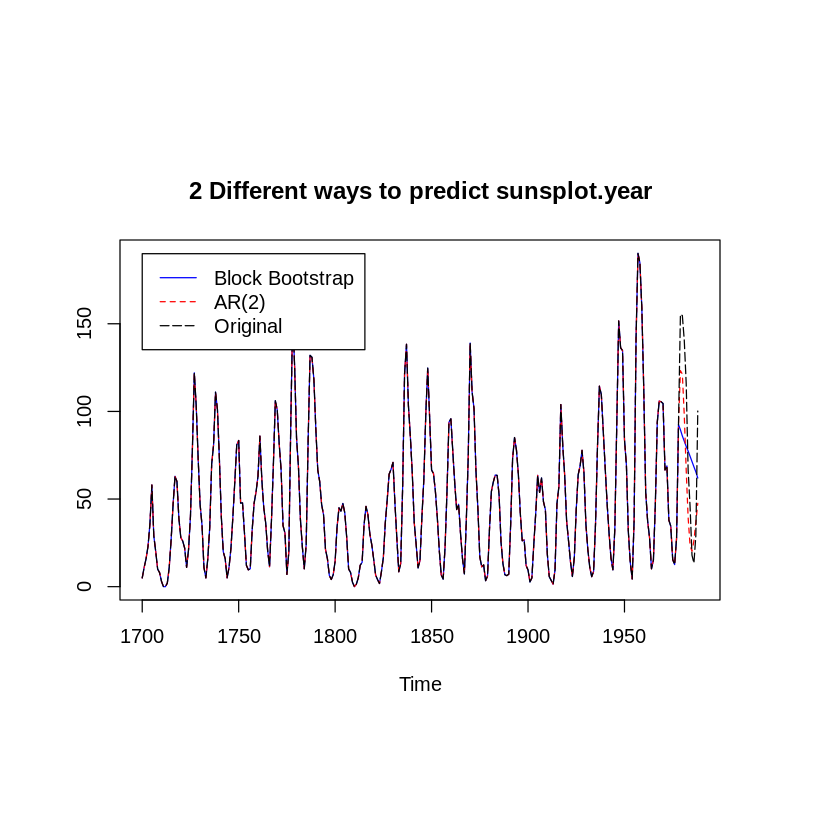

In [ ]:
original = sunspot.year
ar = c(train.data, as.numeric(pred$pred))
bb = c(train.data, pred1)
df = data.frame(opriginal.data = original, AR_model = ar, block_bootstrap = bb)
print(tail(df, 10))
# graph
par(pin = c(5, 3))
ts.plot(df$block_bootstrap, df$AR_model, df$opriginal.data, col = c('blue', 'red', 'black'), main = '2 Different ways to predict sunsplot.year', lty = c(1, 2, 5))
legend(x = 1700, y = 190, legend = c("Block Bootstrap", "AR(2)", "Original"), col = c('blue', 'red', 'black'), lty = c(1, 2, 5))

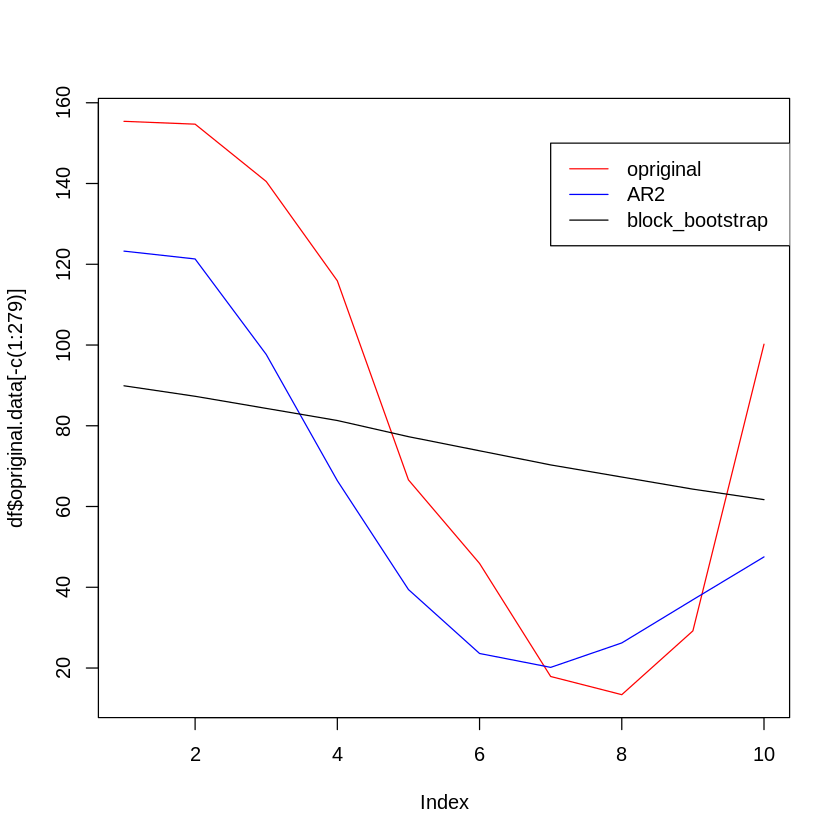

In [ ]:
plot(df$opriginal.data[-c(1:279)], type = "l", col = "red")
lines(df$AR_model[-c(1:279)], col = "blue")
lines(df$block_bootstrap[-c(1:279)], col = "black")
legend(x = 7, y = 150, legend = c('opriginal', 'AR2', 'block_bootstrap'), col = c('red', 'blue', 'black'), lty = c(1, 1, 1))

2.Similar to what we saw in class, use simulation to evaluate the type I error and testing powers of one-way ANOVA. Suppose there are 3 treatments, each with 16 observations. However, assume that the treatment with larger mean has variance 2, instead of 1. (Note: This assignment is to check the influence of the constant variance assumption. Also, as an extended study, you could also check the normality and independence assumptions.) 

In [ ]:
simu = function(mu, times){
    pval = NULL
    t = as.numeric(times)
    for (i in 1:t){
        mat = matrix(rnorm(48), ncol = 3, byrow = F)
        mat[, 2] = rnorm(16, mu, sqrt(2))
        team_mean = apply(mat, 2, mean)
        total_mean = mean(mat)
        # print(mat);print(team_mean);print(total_mean)
        SST = sum((mat - total_mean)^2)
        SSTrt = sum(16 * (team_mean - total_mean)^2)
        SSE = SST - SSTrt
        Test_statistic = (SSTrt / 2) / (SSE / 45)
        p_val = pf(Test_statistic, 2, 45, lower.tail = F)
        pval = c(pval, p_val)
    }
    return (pval)
}

[1] 4216
[1] 6552
[1] 7569


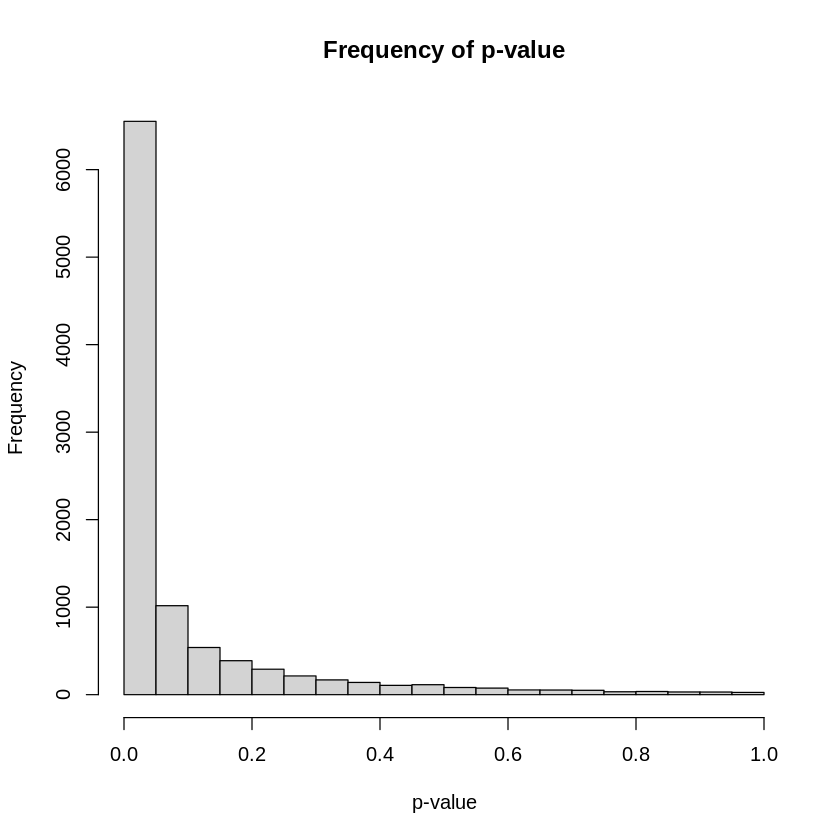

In [ ]:
test = simu(1, 10000)
print(sum(test < 0.01))
print(sum(test < 0.05))
print(sum(test < 0.1))
hist(test, xlab = "p-value", main = "Frequency of p-value")

In [ ]:
simu_power = function(mu, times){
  power = NULL
  t = as.numeric(times)
  for (i in 1:times){
    mat = matrix(rnorm(48), ncol = 3, byrow = F)
    mat[, 2] = rnorm(16, mu, sqrt(2))
    team_mean = apply(mat, 2, mean)
    total_mean = mean(mat)
    # print(mat);print(team_mean);print(total_mean)
    SST = sum((mat - total_mean)^2)
    SSTrt = sum(16 * (team_mean - total_mean)^2)
    SSE = SST - SSTrt
    F_crit = qf(0.05, 2, 45, lower.tail = FALSE)
    f = sqrt((SSTrt/48)/(SSE/45))
    lamda = f^2*48
    beta = pf(F_crit, 2, 45, ncp = lamda, lower.tail = TRUE)
    power = c(power, 1-beta)
  }
  return (power)
}

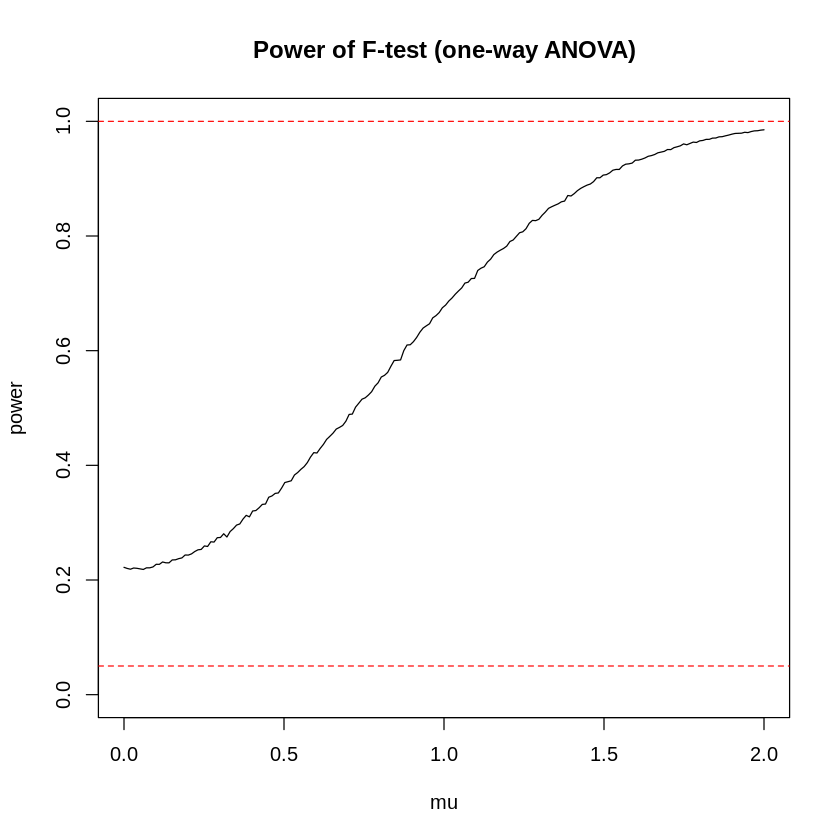

In [ ]:
mu=seq(0, 2, length.out = 200)
test_power=NULL
for (i in mu){
  test_power = c(test_power,mean(simu_power(i, 10000)))
}
plot(x=mu,y=test_power,main="Power of F-test (one-way ANOVA)",
     xlab="mu",ylab="power",type="l",ylim=c(0,1))
abline(h = 1, col = "red", lty=2)
abline(h = 0.05, col = "red", lty=2)

3.Use the bisection, false positions, and/or secant methods to find the roots, and check your answers with the functions in R (e.g., “uniroot”). You need to specify the starting points, convergence criterion, and number of iterations. 

(a)$f(x) = x^3 + 2x^2 + 3x - 1$

(b)$f(x) = e - \frac{1}{3.5 + x}$

(c)$f(x) = \frac{e^{-x}}{\sqrt{1+x^2}} - 0.5$

In [ ]:
# function
func_a = function(x){x^3 + 2 * x^2 + 3 * x - 1}
func_b = function(x){exp(1) - (1 / (3.5 + x))}
func_c = function(x){(exp(-x) / sqrt(1 + x^2)) - 0.5}

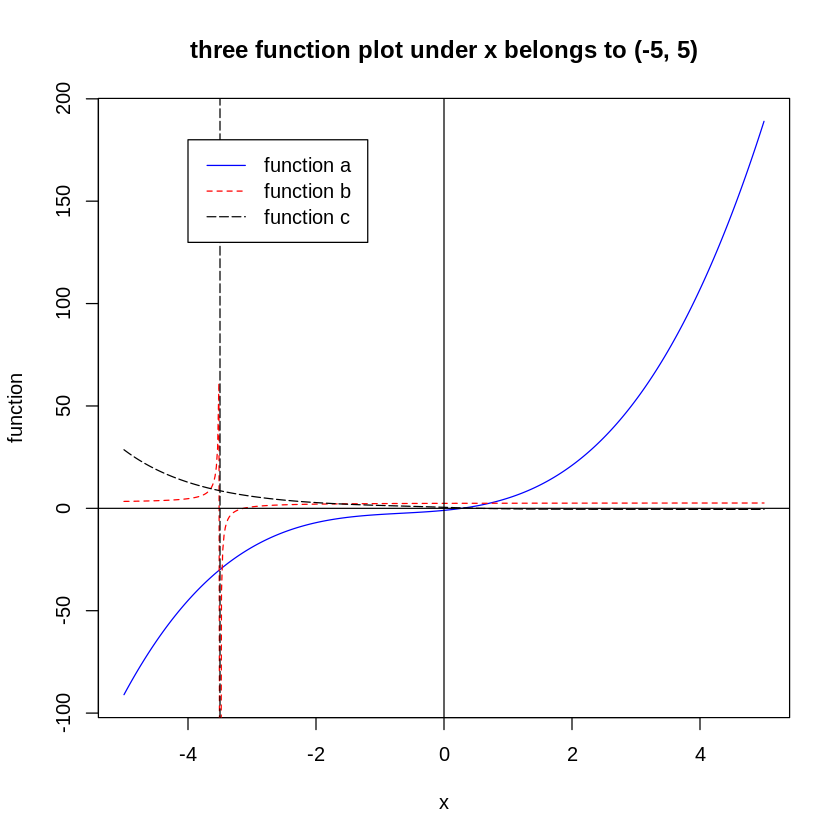

In [ ]:
x = seq(-5, 5, length.out = 500)
plot(x, func_a(x), col = "blue", type = "l", main = "three function plot under x belongs to (-5, 5)", ylab = "function")
lines(x, func_b(x), col = "red", lty = 2)
lines(x, func_c(x), col = "black", lty = 5)
abline(h = 0, v = 0)
abline(v = -3.5, lty = 5)
legend(x = -4, y = 180, legend = c("function a", "function b", "function c"), col = c("blue", "red", "black"), lty = c(1, 2, 5))

In [ ]:
uniroot(func_a, c(0, 1))
cat("===============================\n")
uniroot(func_b, c(-3.3, -3.1))
cat("===============================\n")
uniroot(func_c, c(0, 1))

$root
[1] 0.2756769

$f.root
[1] -2.287619e-05

$iter
[1] 6

$init.it
[1] NA

$estim.prec
[1] 6.103516e-05

$root
[1] -3.132146

$f.root
[1] -0.000187168

$iter
[1] 5

$init.it
[1] NA

$estim.prec
[1] 6.103516e-05

$root
[1] 0.5577421

$f.root
[1] -9.543937e-06

$iter
[1] 5

$init.it
[1] NA

$estim.prec
[1] 6.103516e-05

In [ ]:
# bisection method
bisection = function(f, x0, x1, tol = 1e-10){
    a = x0
    b = x1
    tol = tol
    i = 0
    if (f(a)*f(b) > 0){print("There are no roots between x0 and x1.")}
    while (abs(b - a) > 2 * tol){
        i = i + 1
        mid = 0.5 * (a + b)
        if (f(mid) * f(b) < 0){
            a = mid
        }else{
            b = mid
        }
    }
    return (list(roots = mid, iteration = i, tol = tol))
}

In [ ]:
bisection(func_a, 0, 1)
cat("===============================\n")
bisection(func_b, -3.3, -3.1)
cat("===============================\n")
bisection(func_c, 0, 1)

$roots
[1] 0.2756822

$iteration
[1] 33

$tol
[1] 1e-10

$roots
[1] -3.132121

$iteration
[1] 30

$tol
[1] 1e-10

$roots
[1] 0.5577287

$iteration
[1] 33

$tol
[1] 1e-10

In [ ]:
# secant method
secant = function(f, x0, x1, tol = 1e-10){
    iter = 0
    while (abs(f(x0)) > tol){
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        x0 = x1
        x1 = x2
        iter = iter + 1
    }
    return (list(roots = x1, iteration = iter, tol = tol))
}

In [ ]:
secant(func_a, 0, 1)
cat("============================\n")
secant(func_b, -3.3, -3.1)
cat("============================\n")
secant(func_c, 0, 1)

$roots
[1] 0.2756822

$iteration
[1] 7

$tol
[1] 1e-10

$roots
[1] -3.132121

$iteration
[1] 7

$tol
[1] 1e-10

$roots
[1] 0.5577287

$iteration
[1] 7

$tol
[1] 1e-10

In [ ]:
# false position
falsePosition = function(f, a, b, tol = 1e-10){
    iter = 0
    if (f(a) * f(b) >= 0){
        print("you have not assumed right a and b")
    }

    while (f(a) * f(b) < 0){
        
        iter = iter + 1
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        # print(c)
        if (abs(b - a) < tol){
            # 條件不確定這個條件
            break
        }
        else if (f(c) * f(a) < 0){
            b = c
            
        }else{
            a = c
            
        }
    }
    return (list(roots = c, iteration = iter, tol = tol))
}

In [ ]:
falsePosition(func_a, 0, 1)
cat("====================================\n")
falsePosition(func_b, -3.3, -3.1)
cat("====================================\n")
falsePosition(func_c, 0, 1)

$roots
[1] 0.2756822

$iteration
[1] 37

$tol
[1] 1e-10

$roots
[1] -3.132121

$iteration
[1] 41

$tol
[1] 1e-10

$roots
[1] 0.5577287

$iteration
[1] 24

$tol
[1] 1e-10

4.Consider a multinomial observation $X = (x_1, x_2, x_3, x_4)$ with class probabilities given by $(p_1, p_2, p_3, p_4) = (\frac{2+\theta}{4}, \frac{1-\theta}{4}, \frac{1-\theta}{4}, \frac{\theta}{4})$, where $0< \theta <1$. The sample size is $n = \sum{x_i}$ and the parameter $\theta$ is to be estimated from the observed frequencies (1997, 906, 904, 32), i.e., sample size 3839. Use the secant, Ridder’s (or Brent’s), and Newton-Raphosn methods to find the MLE (via $l'(\theta)$). You may choose your own starting points and convergence criterion (preferred $10^{-6}$ or smaller).

In [ ]:
L = function(x){1997/(2+x) - 1810/(1-x) + 32/x}
dL = function(x){-1997/((2+x)^2) - 1810/((1-x)^2) - 32/(x^2)}

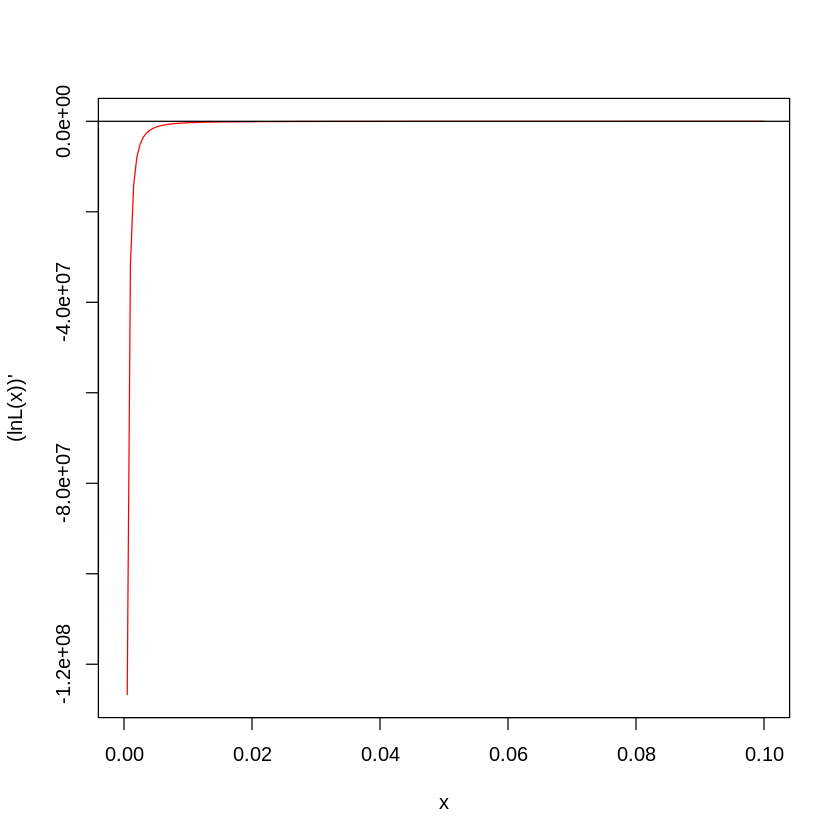

In [ ]:
x = seq(0, 0.1, length.out = 200)

plot(x, dL(x), type = "l", col = "red", ylab = "(lnL(x))'")
abline(h = 0)

In [ ]:
uniroot(L, c(0, 1))

$root
[1] 0.03570979

$f.root
[1] 0.06907122

$iter
[1] 9

$init.it
[1] NA

$estim.prec
[1] 6.103516e-05

In [ ]:
# secant method
secant = function(f, x0, x1, tol = 1e-10){
    iter = 0
    while (abs(f(x0)) > tol){
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        x0 = x1
        x1 = x2
        iter = iter + 1
    }
    return (list(root = x1, iteration = iter, tol = tol))
}

In [ ]:
secant(L, 0.005, 0.5)

$roots
[1] 0.0357123

$iteration
[1] 10

$tol
[1] 1e-10

In [ ]:
# ridders
ridders = function(f, a, b, tol = 1e-10, max.iter = 500){
    x1 = a
    x2 = b
    f1 = f(x1)
    f2 = f(x2)
    iter = 0
    if (f1 * f2 >= 0) stop("f(a) and f(b) must have different signs!")
    while (abs(x1 - x2) > tol && iter <= max.iter){
        mid = 0.5 * (x1 + x2)
        fm = f(mid)
        if (fm == 0){return (list(root = mid, iteration = iter, tol = tol))}
        x3 = mid + (mid - x1) * sign(f1 - f2) * fm / sqrt(fm^2 - f1 * f2)
        f3 = f(x3)
        iter = iter + 1
        if (f3 == 0){return (list(root = x3, iteration = iter, tol = tol))}
        if (fm * f3 < 0){
            x1 = mid
            f1 = fm
            x2 = x3
            f2 = f3
        }else if (f1 * f3 < 0){
            x2 = x3
            f2 = f3
        }else if (f2 * f3 < 0){
            x1 = x3
            f1 = f3
        }else{
            stop("X")
        }
    }
    if (abs(f1) < abs(f2)){
        x0 = x1
        f0 = f1
    }else{
        x0 = x2
        f0 = f2
    }
    return (list(root = x0, iteration = iter, tol = tol))
}

In [ ]:
ridders(L, 0, 1)

$root
[1] 0.0357123

$iteration
[1] 9

$tol
[1] 1e-10

In [ ]:
# Newton Raphson
NR = function(f, df, x0, mat.iter = 500, tol = 1e-10){
    x = x0
  
    iter = 0
    error = tol + 1
    while (error > tol){
        iter = iter + 1
        x = x - f(x)/df(x)
        error = abs(f(x))
    }
    return (list(root = x, iteration = iter, tol = tol))
}

In [ ]:
NR(L, dL, 0.4)

$root
[1] 0.0357123

$iteration
[1] 6

$tol
[1] 1e-10

5.Try at least three different methods to find the estimates of B and C for the 
Gompertz model, $\mu_x = BC^x, x>0$, using the Taiwan data in 2018-2020. You 
may count “nlminb”, “nls” or “opt” as one of the methods (for replacing Newton’s method). Also, similar to what we saw in the class, discuss the influence of starting points to the number of iterations. You may choose the male data or female data.(Bonus: Compare the results of different counties.)


In [4]:
data = read.csv("maledeathrates.csv", header = T)
age = c(0:100)
print(head(data, 20))

   year p_2017 p_2018 p_2019 n_2017 n_2018 n_2019 d_2017 d_2018 d_2019
1     0   4.20   4.55   4.32  95090  88146  87291    399    401    377
2     1   0.29   0.36   0.28 108888 102220  94647     32     37     27
3     2   0.16   0.23   0.23 112410 109010 102418     18     25     24
4     3   0.11   0.14   0.22 110720 112362 109031     12     16     24
5     4   0.13   0.11   0.11 102612 110652 112352     13     12     12
6     5   0.14   0.10   0.16 122946 102621 110652     17     10     18
7     6   0.15   0.12   0.10 104314 122851 102538     16     15     10
8     7   0.09   0.10   0.13  88178 104229 122720      8     10     16
9     8   0.10   0.11   0.10 101632  88112 104183     10     10     10
10    9   0.08   0.11   0.07 104081 101598  88111      8     11      6
11   10   0.15   0.13   0.10 107711 104059 101602     16     14     10
12   11   0.16   0.13   0.09 108141 107678 104051     17     14      9
13   12   0.13   0.18   0.06 108537 108104 107657     14     19      6
14   1

In [7]:
# 2017
# WLS
age = c(0:100)
survival_prob2017 = 1 - data[, 2]/1000

y2017 = log(-log(survival_prob2017))
WLS2017 = lm(y2017 ~ age, weights = c(data[, 5]))
#print(summary(WLS2017)$coef)
C2017 = exp(WLS2017$coef[2])
B2017 = exp(WLS2017$coef[1] - log(C2017 - 1) + log(log(C2017)))
print(C2017); print(B2017)
cat("\n")


# 2018
# WLS
age = c(0:100)
survival_prob2018 = 1 - data[, 3]/1000

y2018 = log(-log(survival_prob2018))
WLS2018 = lm(y2018 ~ age, weights = c(data[, 6]))
#print(summary(WLS2018)$coef)
C2018 = exp(WLS2018$coef[2])
B2018 = exp(WLS2018$coef[1] - log(C2018 - 1) + log(log(C2018)))
print(C2018); print(B2018)
cat("\n")

# 2019
# WLS
age = c(0:100)
survival_prob2019 = 1 - data[, 4]/1000

y2019 = log(-log(survival_prob2019))
WLS2019 = lm(y2019 ~ age, weights = c(data[, 7]))
#print(summary(WLS2019)$coef)
C2019 = exp(WLS2019$coef[2])
B2019 = exp(WLS2019$coef[1] - log(C2019 - 1) + log(log(C2019)))
print(C2019); print(B2019)
cat("\n")

     age 
1.082013 
 (Intercept) 
9.490935e-05 

     age 
1.081235 
 (Intercept) 
9.585549e-05 

     age 
1.082263 
 (Intercept) 
9.000237e-05 



In [9]:
# 2017
# nonlinear maxmization
func_nm2017 = function(nm2017){
    B = nm2017[1]
    C = nm2017[2]
    minbc = sum(data[, 5] * (survival_prob2017 - exp(-B * (C^age * (C - 1) / log(C))))^2)
    return (minbc)
}

nlminb(start = c(1e-5, 1.05), obj = func_nm2017)
nlminb(start = c(1e-3, 1.1), obj = func_nm2017)
nlminb(start = c(1, 0), obj = func_nm2017)
cat("\n")
# 2018
# nonlinear maxmization
func_nm2018 = function(nm2018){
    B = nm2018[1]
    C = nm2018[2]
    minbc = sum(data[, 6] * (survival_prob2018 - exp(-B * (C^age * (C - 1) / log(C))))^2)
    return (minbc)
}

nlminb(start = c(1e-5, 1.05), obj = func_nm2018)
nlminb(start = c(1e-3, 1.1), obj = func_nm2018)
nlminb(start = c(1, 0), obj = func_nm2018)

cat("\n")
# 2019
# nonlinear maxmization
func_nm2019 = function(nm2019){
    B = nm2019[1]
    C = nm2019[2]
    minbc = sum(data[, 7] * (survival_prob2019 - exp(-B * (C^age * (C - 1) / log(C))))^2)
    return (minbc)
}

nlminb(start = c(1e-5, 1.05), obj = func_nm2019)
nlminb(start = c(1e-3, 1.1), obj = func_nm2019)
nlminb(start = c(1, 0), obj = func_nm2019)
cat("\n")

$par
[1] 3.114022e-05 1.099871e+00

$objective
[1] 43.40604

$convergence
[1] 0

$iterations
[1] 34

$evaluations
function gradient 
      56       76 

$message
[1] "both X-convergence and relative convergence (5)"

$par
[1] 1.936738e-06 1.099938e+00

$objective
[1] 5557.101

$convergence
[1] 1

$iterations
[1] 2

$evaluations
function gradient 
      17        4 

$message
[1] "false convergence (8)"

Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2017):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2017):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2017):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2017):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2017):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2017):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2017):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning mess

$par
[1] 1 0

$objective
[1] 6378.747

$convergence
[1] 1

$iterations
[1] 1

$evaluations
function gradient 
      16        2 

$message
[1] "false convergence (8)"

$par
[1] 2.895278e-05 1.100540e+00

$objective
[1] 33.93734

$convergence
[1] 0

$iterations
[1] 34

$evaluations
function gradient 
      58       74 

$message
[1] "both X-convergence and relative convergence (5)"

$par
[1] 1.938626e-06 1.099938e+00

$objective
[1] 5506.554

$convergence
[1] 1

$iterations
[1] 2

$evaluations
function gradient 
      17        4 

$message
[1] "false convergence (8)"

Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2018):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2018):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2018):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2018):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2018):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2018):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2018):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning mess

$par
[1] 1 0

$objective
[1] 6341.733

$convergence
[1] 1

$iterations
[1] 1

$evaluations
function gradient 
      16        2 

$message
[1] "false convergence (8)"

$par
[1] 2.600419e-05 1.101792e+00

$objective
[1] 47.34032

$convergence
[1] 0

$iterations
[1] 35

$evaluations
function gradient 
      65       79 

$message
[1] "both X-convergence and relative convergence (5)"

$par
[1] 1.942836e-06 1.099938e+00

$objective
[1] 5584.058

$convergence
[1] 1

$iterations
[1] 2

$evaluations
function gradient 
      17        4 

$message
[1] "false convergence (8)"

Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2019):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2019):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2019):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2019):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2019):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2019):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning message in nlminb(start = c(1, 0), obj = func_nm2019):
“NA/NaN function evaluation”
Warning message in log(C):
“NaNs produced”
Warning mess

$par
[1] 1 0

$objective
[1] 6440.565

$convergence
[1] 1

$iterations
[1] 1

$evaluations
function gradient 
      16        2 

$message
[1] "false convergence (8)"

In [5]:
# 2017
# MLE
n2017 = data[, 5]
d2017 = data[, 8]
func_mle2017 = function(mle){
  B = mle[1]
  C = mle[2]
  minbc = sum(((n2017 - d2017) * B * (C^age) * (C - 1) / log(C) -
                 d2017 * log(1 - exp(-B * (C^age) * (C - 1) / (log(C)))))^2)
  return (minbc)
}

nlminb(start = c(1e-05, 1.05), obj = func_mle2017)
nlminb(start = c(1e-03, 1.1), obj = func_mle2017)
nlminb(start = c(1, 0), obj = func_mle2017)
# 2018
# MLE
n2018 = data[, 6]
d2018 = data[, 9]
func_mle2018 = function(mle){
  B = mle[1]
  C = mle[2]
  minbc = sum(((n2018 - d2018) * B * (C^age) * (C - 1) / log(C) -
                 d2018 * log(1 - exp(-B * (C^age) * (C - 1) / (log(C)))))^2)
  return (minbc)
}

nlminb(start = c(1e-05, 1.05), obj = func_mle2018)
nlminb(start = c(1e-03, 1.1), obj = func_mle2018)
nlminb(start = c(1, 0), obj = func_mle2018)

# 2019
# MLE
n2019 = data[, 7]
d2019 = data[, 10]
func_mle2019 = function(mle){
  B = mle[1]
  C = mle[2]
  minbc = sum(((n2019 - d2019) * B * (C^age) * (C - 1) / log(C) -
                 d2019 * log(1 - exp(-B * (C^age) * (C - 1) / (log(C)))))^2)
  return (minbc)
}

nlminb(start = c(1e-05, 1.05), obj = func_mle2019)
nlminb(start = c(1e-03, 1.1), obj = func_mle2019)
nlminb(start = c(1, 0), obj = func_mle2019)


$par
[1] 5.347169e-05 1.092087e+00

$objective
[1] 3606200650

$convergence
[1] 0

$iterations
[1] 28

$evaluations
function gradient 
      66       63 

$message
[1] "relative convergence (4)"

Warning message in log(1 - exp(-B * (C^age) * (C - 1)/(log(C)))):
“NaNs produced”
Warning message in nlminb(start = c(0.001, 1.1), obj = func_mle2017):
“NA/NaN function evaluation”
Warning message in log(1 - exp(-B * (C^age) * (C - 1)/(log(C)))):
“NaNs produced”
Warning message in nlminb(start = c(0.001, 1.1), obj = func_mle2017):
“NA/NaN function evaluation”
Warning message in log(1 - exp(-B * (C^age) * (C - 1)/(log(C)))):
“NaNs produced”
Warning message in nlminb(start = c(0.001, 1.1), obj = func_mle2017):
“NA/NaN function evaluation”


$par
[1] 5.347168e-05 1.092087e+00

$objective
[1] 3606200650

$convergence
[1] 0

$iterations
[1] 18

$evaluations
function gradient 
      52       48 

$message
[1] "both X-convergence and relative convergence (5)"

Warning message in nlminb(start = c(1, 0), obj = func_mle2017):
“NA/NaN function evaluation”


$par
[1] 1 0

$objective
[1] Inf

$convergence
[1] 0

$iterations
[1] 1

$evaluations
function gradient 
       2        2 

$message
[1] "X-convergence (3)"

Warning message in log(1 - exp(-B * (C^age) * (C - 1)/(log(C)))):
“NaNs produced”
Warning message in nlminb(start = c(1e-05, 1.05), obj = func_mle2018):
“NA/NaN function evaluation”


$par
[1] 5.044606e-05 1.092544e+00

$objective
[1] 3647379939

$convergence
[1] 0

$iterations
[1] 26

$evaluations
function gradient 
      60       63 

$message
[1] "both X-convergence and relative convergence (5)"

Warning message in log(1 - exp(-B * (C^age) * (C - 1)/(log(C)))):
“NaNs produced”
Warning message in nlminb(start = c(0.001, 1.1), obj = func_mle2018):
“NA/NaN function evaluation”
Warning message in log(1 - exp(-B * (C^age) * (C - 1)/(log(C)))):
“NaNs produced”
Warning message in nlminb(start = c(0.001, 1.1), obj = func_mle2018):
“NA/NaN function evaluation”
Warning message in log(1 - exp(-B * (C^age) * (C - 1)/(log(C)))):
“NaNs produced”
Warning message in nlminb(start = c(0.001, 1.1), obj = func_mle2018):
“NA/NaN function evaluation”


$par
[1] 5.044607e-05 1.092544e+00

$objective
[1] 3647379939

$convergence
[1] 0

$iterations
[1] 18

$evaluations
function gradient 
      56       48 

$message
[1] "relative convergence (4)"

Warning message in nlminb(start = c(1, 0), obj = func_mle2018):
“NA/NaN function evaluation”


$par
[1] 1 0

$objective
[1] Inf

$convergence
[1] 0

$iterations
[1] 1

$evaluations
function gradient 
       2        2 

$message
[1] "X-convergence (3)"

$par
[1] 5.099187e-05 1.092121e+00

$objective
[1] 3775987576

$convergence
[1] 0

$iterations
[1] 27

$evaluations
function gradient 
      71       61 

$message
[1] "relative convergence (4)"

Warning message in log(1 - exp(-B * (C^age) * (C - 1)/(log(C)))):
“NaNs produced”
Warning message in nlminb(start = c(0.001, 1.1), obj = func_mle2019):
“NA/NaN function evaluation”
Warning message in log(1 - exp(-B * (C^age) * (C - 1)/(log(C)))):
“NaNs produced”
Warning message in nlminb(start = c(0.001, 1.1), obj = func_mle2019):
“NA/NaN function evaluation”
Warning message in log(1 - exp(-B * (C^age) * (C - 1)/(log(C)))):
“NaNs produced”
Warning message in nlminb(start = c(0.001, 1.1), obj = func_mle2019):
“NA/NaN function evaluation”


$par
[1] 5.099186e-05 1.092121e+00

$objective
[1] 3775987576

$convergence
[1] 0

$iterations
[1] 19

$evaluations
function gradient 
      46       51 

$message
[1] "both X-convergence and relative convergence (5)"

Warning message in nlminb(start = c(1, 0), obj = func_mle2019):
“NA/NaN function evaluation”


$par
[1] 1 0

$objective
[1] Inf

$convergence
[1] 0

$iterations
[1] 1

$evaluations
function gradient 
       2        2 

$message
[1] "X-convergence (3)"